### Regularized Linear Model - Ridge Regression
- 릿지는 L2 규제를 적용하는것 (회귀계수를 0에 가깝게)

In [2]:
# boston data loading
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [9]:
import numpy as np
import pandas as pd

In [55]:
boston = load_boston()
X_data = boston.data
y_target = boston.target

# Ridge object
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(
      ridge  # 적용할 모델 지정
    , X_data # 데이터 지정
    , y_target # 답 지정
    , scoring='neg_mean_squared_error'# 평가방법
    , cv=5
)

In [10]:
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]


In [13]:
# RMSE 구하기
rmse_scores = (-1*(neg_mse_scores))**(1/2)
rmse_scoress = np.sqrt(-1*neg_mse_scores)
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scoress,3))

 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]


In [16]:
# 평균 오차 구하기
# Ridge(alpha=10)의 평균 오차
avg_rmse = np.mean(rmse_scores)
print('5 fold의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 fold의 평균 RMSE : 5.518


In [34]:
# Ridge 적용, alpha [0, 0.1, 1, 10, 100] 알파를 여러개 적용해서 best 찾기

alphas = [0, 0.1, 1, 10, 100, 120, 140]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(
      ridge  # 적용할 모델 지정
    , X_data # 데이터 지정
    , y_target # 답 지정
    , scoring='neg_mean_squared_error'# 평가방법
    , cv=5
    )
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    out_str = 'alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'
    print(out_str.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330
alpha 120 일 때 5 folds 의 평균 RMSE : 5.326
alpha 140 일 때 5 folds 의 평균 RMSE : 5.327


alpha 120 일때가 최소 평균 오차가 나오므로, 120이 최적값이다

#### 시각화하기

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

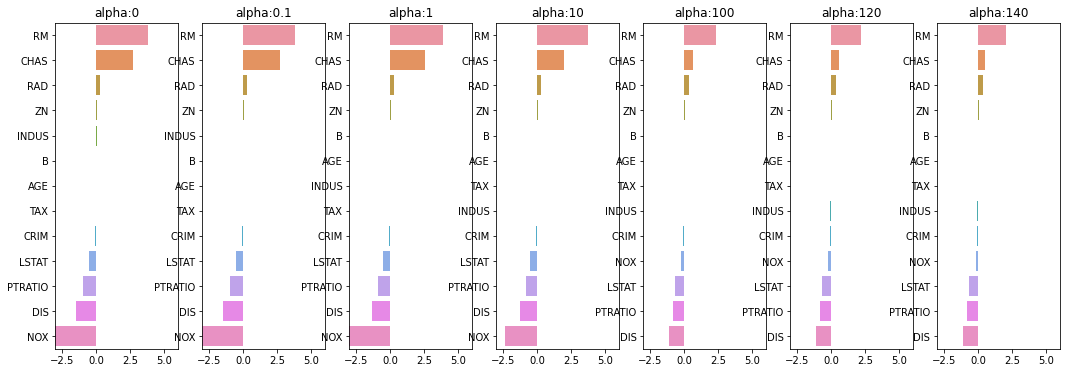

In [40]:
X_data= pd.DataFrame(
    boston.data
    , columns=boston.feature_names
)


# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=7)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()


ridge(L2 규제 적용) alpha값에 따라서 회귀계수값이 작아짐을 시각적으로 이해

## Lasso Regression, ElasticNet

In [39]:
from sklearn.linear_model import Lasso, ElasticNet

In [157]:
# 릿지, 라쏘, 엘라스틱넷을 처리하는 함수 선언 p.325
def get_linear_reg_eval(  
      model_name    # 모델(Ridge, Lasso, ElasticNet)
    , params=None   #parameters(alpha값 여러개 []리스트로)
    , X_data_p=None  # data
    , y_target_p=None  # label
    , verbose=True):  # 출력 상세여부
    

    coeff_df= pd.DataFrame()
    # 오차(RMSE) 출력
    if verbose :
        print('######', model_name, '######')
    
    for param in params:
        if model_name =='Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        # cross_val_score : 점수 구하기만 가능
        neg_mse = cross_val_score(
            model  # 적용할 모델 지정
            , X_data_p # 데이터 지정
            , y_target_p # 답 지정
            , scoring='neg_mean_squared_error'# 평가방법
            , cv=5
        )
        avg_rmse = np.mean(np.sqrt(-1*neg_mse))
        out_str = 'alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'
        print(out_str.format(param, avg_rmse))
    
    # 모델 학습
        model.fit(X_data, y_target)
    # 회귀계수값 저장
        coeff = pd.Series(
              data=model.coef_  # 학습되어 생성된 모델의 계수값
            , index = X_data.columns
        )
        colname = 'alpha: ' + str(param)
        coeff_df[colname] = coeff
    
    return coeff_df   # 계수의 이름(컬럼명)과, 계수값을 가지는 데이터 프레임 반환 
    

In [148]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_p=X_data, y_target_p=y_target)
coeff_lasso_df

###### Lasso ######
alpha 0.07 일 때 5 folds 의 평균 RMSE : 5.612
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.615
alpha 0.5 일 때 5 folds 의 평균 RMSE : 5.669
alpha 1 일 때 5 folds 의 평균 RMSE : 5.776
alpha 3 일 때 5 folds 의 평균 RMSE : 6.189


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


-  Lasso 에서 alpha 를 3으로 증가시키니 계수값이 0으로 바뀌는 컬럼들이 늘어나고 있다

In [142]:
ridge_alphas = [ 0.07, 0.1, 0.5, 1, 3,50,100,150]
coeff_ridge_df =get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_p=X_data, y_target_p=y_target)
coeff_ridge_df

###### Ridge ######
alpha 0.07 일 때 5 folds 의 평균 RMSE : 5.799
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 0.5 일 때 5 folds 의 평균 RMSE : 5.700
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 3 일 때 5 folds 의 평균 RMSE : 5.589
alpha 50 일 때 5 folds 의 평균 RMSE : 5.373
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330
alpha 150 일 때 5 folds 의 평균 RMSE : 5.328


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3,alpha: 50,alpha: 100,alpha: 150
CRIM,-0.107628,-0.107474,-0.105866,-0.104595,-0.102470,-0.102263,-0.102202,-0.101606
ZN,0.046528,0.046572,0.047041,0.047443,0.048304,0.052771,0.054496,0.055245
INDUS,0.017307,0.015999,0.002252,-0.008805,-0.028456,-0.050937,-0.052826,-0.052757
CHAS,2.674915,2.670019,2.612117,2.552393,2.371317,1.006040,0.638335,0.472453
NOX,-16.995144,-16.684645,-13.416261,-10.777015,-6.030391,-0.527632,-0.262847,-0.171709
RM,3.815869,3.818233,3.840757,3.854000,3.847645,2.935628,2.334536,1.945427
AGE,0.000006,-0.000269,-0.003144,-0.005415,-0.009189,-0.004807,0.001212,0.005691
DIS,-1.464200,-1.459626,-1.411491,-1.372654,-1.302931,-1.200947,-1.153390,-1.104071
RAD,0.304241,0.303515,0.295989,0.290142,0.280973,0.300619,0.315358,0.323369
TAX,-0.012396,-0.012421,-0.012686,-0.012912,-0.013379,-0.015208,-0.015856,-0.016214


- Ridge 모델에서는 alpha 값이 3으로 증가함에 따라 계수값이 감소는 하지만, 0으로 되지는 않는다

In [123]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_p=X_data, y_target_p=y_target)
coeff_elastic_df

###### ElasticNet ######
alpha 0.07 일 때 5 folds 의 평균 RMSE : 5.542
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.526
alpha 0.5 일 때 5 folds 의 평균 RMSE : 5.467
alpha 1 일 때 5 folds 의 평균 RMSE : 5.597
alpha 3 일 때 5 folds 의 평균 RMSE : 6.068


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


- Elastic 은 기본적으로 Lasso 에 추가적으로 L2규제가 더해진 것이므로, 계수값이 0으로 되는 컬럼이 존재하고, 나머지 컬럼은 그 계수값이 L2 규제에 의해서 감소한다.

- alpha가 0.5 일때 최소평균 오차를 가진다. => CHAS, NOX 를 제외한 모든 컬럼의 영향을 받아 식이 생성되는 경우 

### 데이터 변환
- StandardScaler => 정규분포 형태의 값으로 변환
- MinMaxScaler => 최소 0, 최대 1 값으로 변환
- Polynomial => degree 적용, 다항식 적용
- log => 정규분포 형태로 변환

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# 데이터 변환방법에 따라, 변환 데이터를 반환하는 함수 생성
def get_scaled_data(
      method='None'   # 변환방법
    , degree_p=None  # 다항식 차수
    , input_data=None  # 변환할 데이터
):
    if method =='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
        
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
        
    elif method =='Log':
        scaled_data = np.log1p(input_data)
        
    else :
        scaled_data = input_data
    
    if degree_p != None:
        scaled_data = PolynomialFeatures(degree=degree_p).fit_transform(scaled_data)
        
    return scaled_data

In [159]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None,None)
                 ,('Standard', None)
                 ,('Standard', 2)
                 ,('MinMax', None)
                 ,('MinMax',2)
                 ,('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], degree_p=scale_method[1], input_data=X_data)
    out_str = '\n## 변환 유형:{0}, Polynomial Degree:{1}'
    print(out_str.format(scale_method[0], scale_method[1]))
    
    get_linear_reg_eval('Ridge', params=alphas, X_data_p=X_data_scaled, 
                        y_target_p=y_target)


## 변환 유형:None, Polynomial Degree:None
###### Ridge ######
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330

## 변환 유형:Standard, Polynomial Degree:None
###### Ridge ######
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.826
alpha 1 일 때 5 folds 의 평균 RMSE : 5.803
alpha 10 일 때 5 folds 의 평균 RMSE : 5.637
alpha 100 일 때 5 folds 의 평균 RMSE : 5.421

## 변환 유형:Standard, Polynomial Degree:2
###### Ridge ######
alpha 0.1 일 때 5 folds 의 평균 RMSE : 8.827
alpha 1 일 때 5 folds 의 평균 RMSE : 6.871
alpha 10 일 때 5 folds 의 평균 RMSE : 5.485
alpha 100 일 때 5 folds 의 평균 RMSE : 4.634

## 변환 유형:MinMax, Polynomial Degree:None
###### Ridge ######
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.764
alpha 1 일 때 5 folds 의 평균 RMSE : 5.465
alpha 10 일 때 5 folds 의 평균 RMSE : 5.754
alpha 100 일 때 5 folds 의 평균 RMSE : 7.635

## 변환 유형:MinMax, Polynomial Degree:2
###### Ridge ######
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.298
alpha 1 일 때 5 folds 의 평균 RMSE :

In [154]:
# 데이터 프레임 생성
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
# 위 데이터프레임에 가격 추가
boston_df['PRICE']= boston.target

X_data = boston_df.drop(
    ['PRICE']   # 삭제할 컬럼
    , axis = 1   # 삭제방향
    , inplace=False
    )
# 답 분리
y_target = boston_df['PRICE']